# Notebook error analysis 

## Python built-in error types + library customized type of errors


### 1. GitHub - the stack dedup

https://huggingface.co/datasets/bigcode/the-stack-dedup/tree/main/data/jupyter-notebook


In [1]:
# read in all errors from the file
import pandas as pd

df2_err = pd.read_excel('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_p5.xlsx')
df2_err.head()

,fname,ename,evalue,traceback,lib,lib2,lib_parsed,lib_parsed_pop
0,00000-101-cookie-clicker-v2-checkpoint.ipynb,keyboardinterrupt,NaN,['--------------------------------------------...,"urllib3,selenium",NaN,selenium,NaN
1,00000-1012-demand-forecasting-data-prep-from-s...,libcustomerrors,"FATAL: no pg_hba.conf entry for host ""75.166....",['--------------------------------------------...,psycopg2,NaN,psycopg2,NaN
2,00000-1017-heatmapseq2seq.ipynb,valueerror,"x and y must have same first dimension, but ha...",['--------------------------------------------...,matplotlib,NaN,matplotlib,matplotlib
3,00000-1023-crawler-20190515-20190516.ipynb,connectionerror,HTTPSConnectionPool(host='www.backpackers.com....,['--------------------------------------------...,"requests,urllib3",NaN,urllib3,NaN
4,00000-1033-peer-solution-predicting-survival-t...,libcustomerrors,<urlopen error [Errno 11001] getaddrinfo failed>,['--------------------------------------------...,pandas,pandas,pandas,pandas


In [2]:
df2_err.fname.nunique()

87566

In [3]:
df2_err.count()

fname             137972
ename             137972
evalue            121971
traceback         137972
lib                56921
lib2               33075
lib_parsed         72697
lib_parsed_pop     59566
dtype: int64

In [4]:
! python --version

Python 3.11.5


In [7]:
import util

exception_list = util.get_python_exception_names()
len(exception_list)

66

In [8]:
import copy

df2_err_builtin_exps = df2_err[df2_err["ename"].isin(exception_list)]
df2_err_other_exps = copy.deepcopy(df2_err[~df2_err["ename"].isin(exception_list)])
print("{0:.2%} errors have {1} different exception names that are the same as Python built-in exceptions".format(len(df2_err_builtin_exps)/len(df2_err),
                                                                                                                len(df2_err_builtin_exps.ename.unique())
))
print("Other {0:.2%} errors ({1} samples) have {2} different exception names".format(len(df2_err_other_exps)/len(df2_err), 
                                                                                  len(df2_err_other_exps),
                                                                                  df2_err_other_exps["ename"].nunique()))


93.26% errors have 53 different exception names that are the same as Python built-in exceptions
Other 6.74% errors (9296 samples) have 1 different exception names


<Axes: xlabel='ename'>

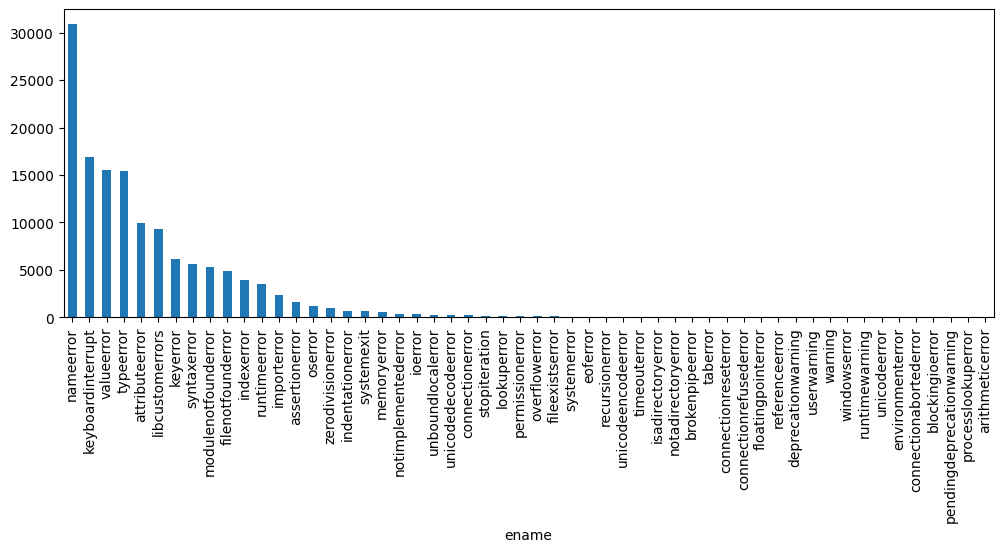

In [7]:
# we adress other exps as library custom exceptions (libcustomerrors)
df2_err.loc[(~df2_err["ename"].isin(exception_list)), "ename"] = "libcustomerrors"
df2_err.to_excel("C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_p6.xlsx", index=False, engine="xlsxwriter")
df2_err["ename"].groupby([df2_err["ename"]]).count().sort_values(ascending=0).plot(kind="bar", figsize=(12,4))

In [9]:
df2_err_other_exps.loc[(df2_err_other_exps["ename"]=="error")&(df2_err_other_exps["lib"].isnull()),"lib"]

Series([], Name: lib, dtype: object)

In [36]:
import util

util.print_traceback(df2_err_other_exps.loc[df2_err_other_exps["ename"]=="error","traceback"][720])

---------------------------------------------------------------------------
error                                     Traceback (most recent call last)
<ipython-input-13-d0324d1b3e6c> in <module>()
      6 display_surf = pygame.display.set_mode((400,400))
      7 pygame.display.set_caption('hello world!')
----> 8 img = pygame.image.load('hh.png')
      9 x,y = 10,10
     10 FPS = 60

error: Couldn't open hh.png


### 2. nbs from kaggle


In [1]:
# read in all errors from the file
import pandas as pd

path_err = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k_error'
df_err = pd.read_excel(path_err+'/nberror_k_p4.xlsx')
df_err.head()

,fname,ename,evalue,traceback,lib,lib2,lib_parsed
0,aaronalbrecht_hardness-contest.ipynb,valueerror,The feature names should match those that were...,['--------------------------------------------...,sklearn,NaN,sklearn
1,aaryaamoharir_resnet-50-my-version.ipynb,keyboardinterrupt,NaN,['--------------------------------------------...,"keras,tensorflow",tensorflow,tensorflow
2,aaryaamoharir_resnet-50-version-2.ipynb,keyboardinterrupt,NaN,['--------------------------------------------...,"keras,tensorflow",tensorflow,tensorflow
3,achintyabhat_activation-maximization.ipynb,typeerror,'AxesSubplot' object is not subscriptable,['--------------------------------------------...,NaN,NaN,NaN
4,adityabajaj03_dr-cnn.ipynb,keyerror,'val_categorical_accuracy',['--------------------------------------------...,NaN,NaN,NaN


In [2]:
df_err.fname.nunique()

4064

In [3]:
df_err.count()

fname         6202
ename         6198
evalue        5121
traceback     6202
lib           3440
lib2          2065
lib_parsed    4107
dtype: int64

92.68% errors have 29 different exception names that are the same as Python built-in exceptions
Other 7.32% errors (454 samples) have 88 different exception names


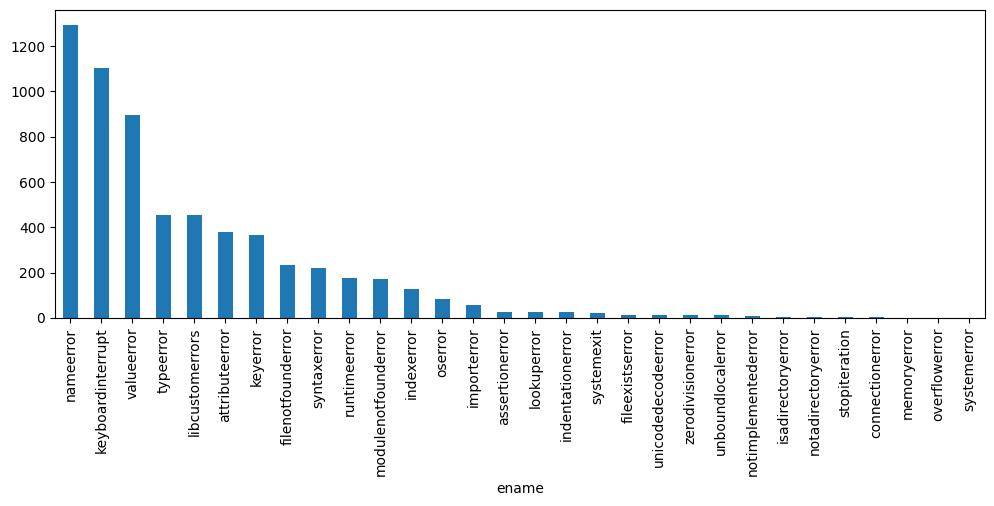

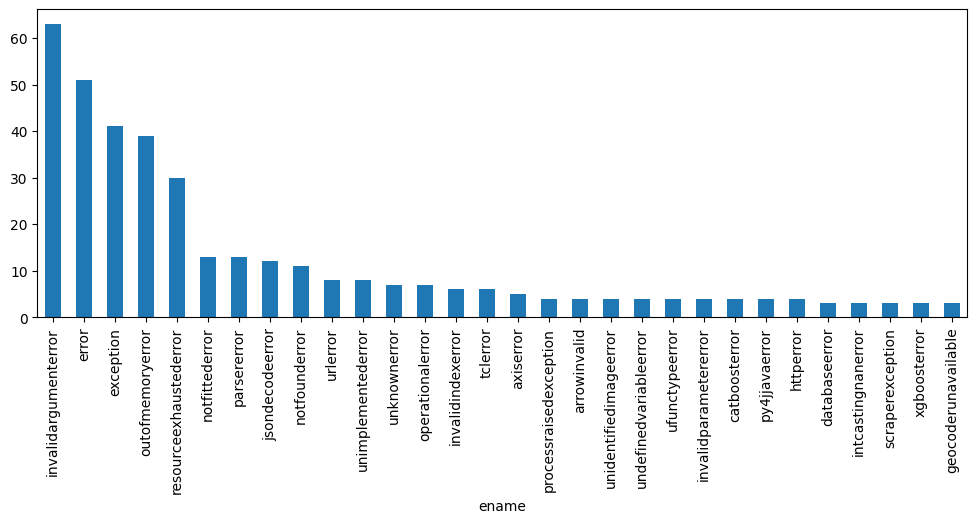

In [4]:
import util
import matplotlib.pyplot as plt
import copy

exception_list = util.get_python_exception_names()

df_err_builtin_exps = df_err[df_err["ename"].isin(exception_list)]
df_err_other_exps = copy.deepcopy(df_err[~df_err["ename"].isin(exception_list)])
print("{0:.2%} errors have {1} different exception names that are the same as Python built-in exceptions".format(len(df_err_builtin_exps)/len(df_err),
                                                                                                                len(df_err_builtin_exps.ename.unique())
))
print("Other {0:.2%} errors ({1} samples) have {2} different exception names".format(len(df_err_other_exps)/len(df_err), 
                                                                                  len(df_err_other_exps),
                                                                                  df_err_other_exps["ename"].nunique()))

# we adress other exps as library custom exceptions (libcustomerrors)
df_err.loc[(~df_err["ename"].isin(exception_list)), "ename"] = "libcustomerrors"
df_err.to_excel(path_err+'/nberror_k_p5.xlsx', index=False, engine="xlsxwriter")
df_err["ename"].groupby([df_err["ename"]]).count().sort_values(ascending=0).plot(kind="bar", figsize=(12,4))
plt.show()

# within the library custom exceptions
df_err_other_exps["ename"].groupby([df_err_other_exps["ename"]]).count().sort_values(ascending=0)[:30].plot(kind="bar", figsize=(12,4))
plt.show()